In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import seaborn as sb
 
import sklearn
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [7]:
np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [9]:
cd /home/bhanu/Downloads


/home/bhanu/Downloads


In [23]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','draft','wt','qsec','vs','am','gear','carb']
x=cars.ix[:,(1,3,4,6)].values
y=cars.ix[:,9].values
print(x)

[[ 21.    160.    110.      2.62 ]
 [ 21.    160.    110.      2.875]
 [ 22.8   108.     93.      2.32 ]
 [ 21.4   258.    110.      3.215]
 [ 18.7   360.    175.      3.44 ]
 [ 18.1   225.    105.      3.46 ]
 [ 14.3   360.    245.      3.57 ]
 [ 24.4   146.7    62.      3.19 ]
 [ 22.8   140.8    95.      3.15 ]
 [ 19.2   167.6   123.      3.44 ]
 [ 17.8   167.6   123.      3.44 ]
 [ 16.4   275.8   180.      4.07 ]
 [ 17.3   275.8   180.      3.73 ]
 [ 15.2   275.8   180.      3.78 ]
 [ 10.4   472.    205.      5.25 ]
 [ 10.4   460.    215.      5.424]
 [ 14.7   440.    230.      5.345]
 [ 32.4    78.7    66.      2.2  ]
 [ 30.4    75.7    52.      1.615]
 [ 33.9    71.1    65.      1.835]
 [ 21.5   120.1    97.      2.465]
 [ 15.5   318.    150.      3.52 ]
 [ 15.2   304.    150.      3.435]
 [ 13.3   350.    245.      3.84 ]
 [ 19.2   400.    175.      3.845]
 [ 27.3    79.     66.      1.935]
 [ 26.    120.3    91.      2.14 ]
 [ 30.4    95.1   113.      1.513]
 [ 15.8   351.    26

/home/bhanu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bhanu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


[[  0.       1.       0.255    2.    ]
 [ 11.      12.       0.9621   2.    ]
 [  9.      10.       1.4      2.    ]
 [ 13.      33.       1.9103   3.    ]
 [ 17.      25.       5.1157   2.    ]
 [ 20.      26.       7.5097   2.    ]
 [  6.      23.      10.0535   2.    ]
 [ 19.      36.      10.1666   3.    ]
 [ 21.      22.      14.0035   2.    ]
 [  2.      37.      14.1771   3.    ]
 [ 14.      15.      15.6215   2.    ]
 [ 18.      39.      16.7875   4.    ]
 [ 31.      41.      19.8678   4.    ]
 [ 32.      34.      21.6097   4.    ]
 [ 28.      38.      22.5473   3.    ]
 [  8.      44.      29.8447   5.    ]
 [  3.       5.      33.5403   2.    ]
 [ 16.      42.      38.201    3.    ]
 [  4.      24.      40.0052   2.    ]
 [ 27.      47.      41.616    6.    ]
 [  7.      51.      62.3703   7.    ]
 [ 35.      40.      71.6674   5.    ]
 [ 29.      45.      77.7256   5.    ]
 [ 30.      46.     121.0837   4.    ]
 [ 52.      54.     124.075   12.    ]
 [ 48.      53.     131.1

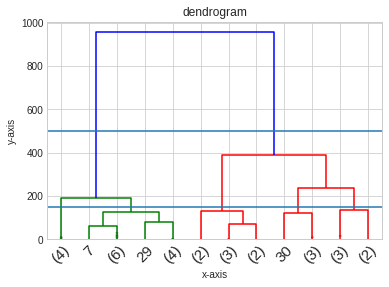

In [22]:
z=linkage(x,'ward')
print(z)
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('dendrogram')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [19]:
k=2
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [21]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='cosine',linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.1875